In [2]:
#import neccesary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [7]:
print(X_train[15].shape)

(28, 28)


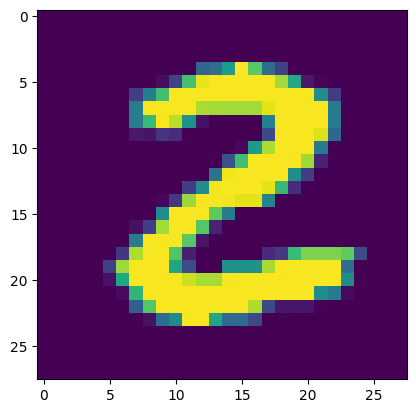

2


In [8]:
#for display the image
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

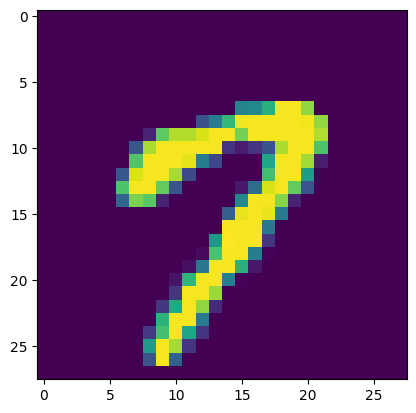

7


In [9]:
plt.imshow(X_train[15])
plt.show()

print(Y_train[15])

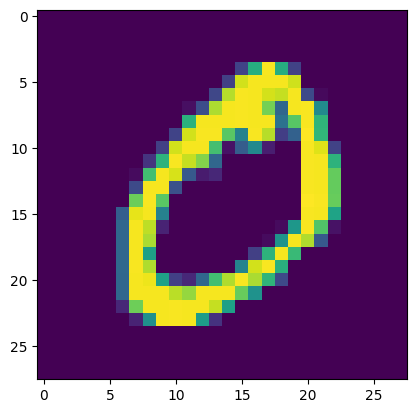

0


In [10]:
plt.imshow(X_train[1])
plt.show()

print(Y_train[1])

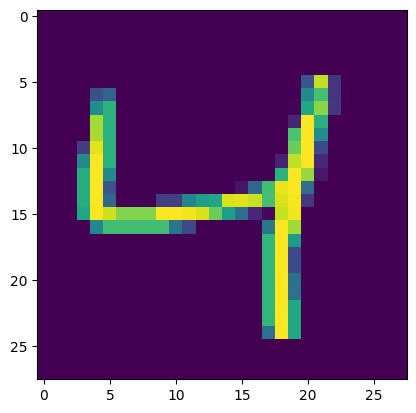

4


In [11]:
plt.imshow(X_train[2])
plt.show()

print(Y_train[2])

In [12]:
#image levels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [13]:
#unique value in y_train
print(np.unique(Y_train))

#unique value in y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
#scale the value
X_train= X_train/255
X_test= X_test/255

In [15]:
print(X_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**=> build the neural network**

In [16]:
#setting the layer of neural network
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#compile the neural network
model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [18]:
#training the neural network
model.fit(X_train, Y_train, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8578 - loss: 0.5006
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9542 - loss: 0.1549
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9667 - loss: 0.1111
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9736 - loss: 0.0859
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0698
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9850 - loss: 0.0490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.0421
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0386
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0341


In [19]:
loss, accuracy= model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1180
0.9742000102996826
0.10200245678424835


In [20]:
print(X_test.shape)

(10000, 28, 28)


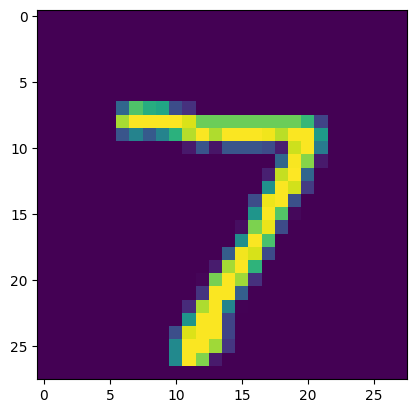

In [21]:
#first data point in tesr data
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[2.7561208e-04 3.1593682e-03 7.5351787e-01 9.7917467e-01 2.7813157e-06
 1.4458114e-02 5.1155727e-13 1.0000000e+00 9.6653850e-05 6.2183309e-01]


In [26]:
label_for_first_test_image= np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [28]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 3, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

In [29]:
conf_mat= confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    2    2    3    2    2    2    5]
 [   1 1116    2    4    0    2    3    1    5    1]
 [   6    0 1000    6    2    2    3    5    8    0]
 [   0    0    3  984    3    5    0    6    2    7]
 [   1    0    2    1  958    0    5    3    1   11]
 [   2    0    0   22    5  853    5    1    1    3]
 [   5    2    1    1    7    3  938    0    1    0]
 [   1    0   13    3    3    0    0  998    0   10]
 [   3    0    2   12    5    4    1    2  941    4]
 [   2    3    0    5   15    1    0    2    1  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

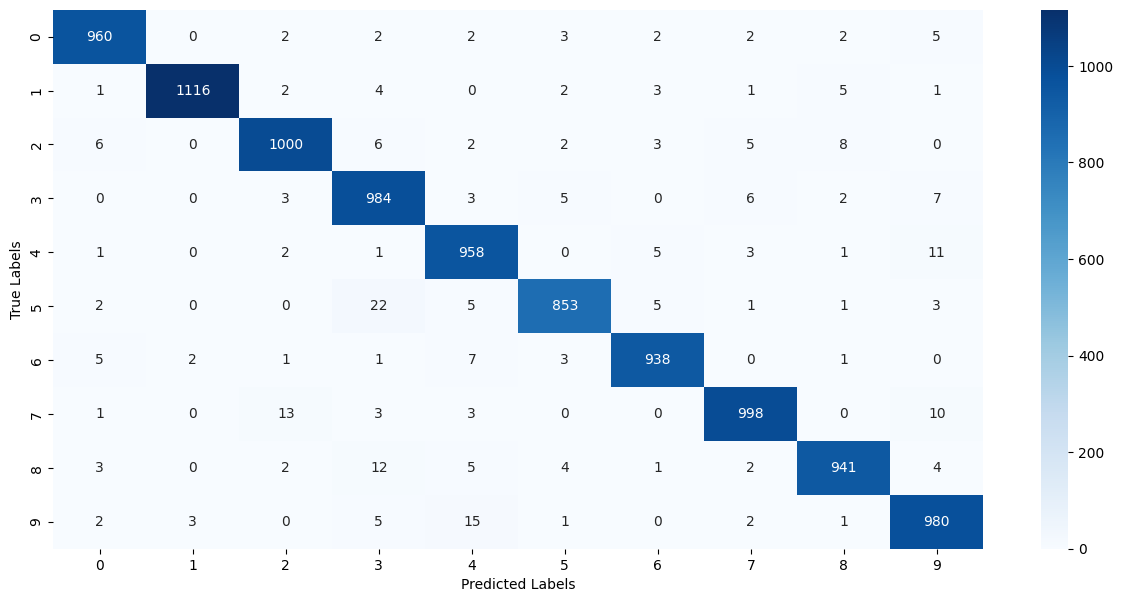

In [31]:
plt.figure(figsize= (15, 7))
sns.heatmap(conf_mat, annot= True, fmt= "d", cmap= "Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [41]:
input_image_path= "/content/drive/MyDrive/Project/dataset/MNIST_digit.png"
input_image= cv2.imread(input_image_path)

In [42]:
type(input_image)

numpy.ndarray

In [43]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


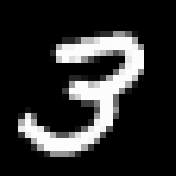

In [45]:
cv2_imshow(input_image)

In [46]:
input_image.shape

(176, 176, 3)

In [47]:
grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [48]:
grayscale.shape

(176, 176)

In [49]:
input_image_resize= cv2.resize(grayscale, (28, 28))

In [50]:
input_image_resize.shape

(28, 28)

In [51]:
cv2_imshow(input_image_resize)

In [52]:
input_image_resize= input_image_resize/255

In [53]:
type(input_image_resize)

numpy.ndarray

In [54]:
image_reshaped= np.reshape(input_image_resize, [1, 28, 28])

In [55]:
input_prediction= model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[5.4070375e-09 8.0516720e-08 6.7672580e-02 1.0000000e+00 9.6792363e-08
  8.7724429e-01 3.6578865e-24 2.7040492e-03 7.0529192e-04 9.9988908e-01]]


In [56]:
input_pred_label= np.argmax(input_prediction)

In [57]:
print(input_pred_label)

3


Path of the image to be predicted: /content/drive/MyDrive/Project/dataset/MNIST_digit.png


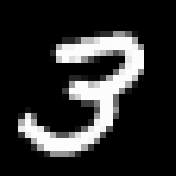

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label:  3


In [58]:
input_image_path= input("Path of the image to be predicted: ")
input_image= cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize= cv2.resize(grayscale, (28, 28))
input_image_resize= input_image_resize/255
image_reshaped= np.reshape(input_image_resize, [1, 28, 28])
input_prediction= model.predict(image_reshaped)
input_pred_label= np.argmax(input_prediction)
print("Predicted Label: ", input_pred_label)